In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
transaction_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/dataset.csv', error_bad_lines=False)

In [ ]:
transaction_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
transaction_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
transaction_data.shape

(284807, 31)

In [ ]:
transaction_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
transaction_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

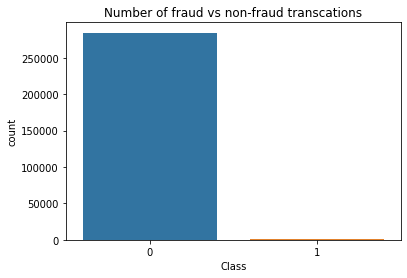

In [ ]:
#Number of fraud vs non-fraud transcations
sns.countplot(x='Class', data=transaction_data)
plt.title('Number of fraud vs non-fraud transcations')
plt.show()

In [ ]:
#separating data to legit or fraud
legit = transaction_data[transaction_data.Class == 0]
fraud = transaction_data[transaction_data.Class == 1]

In [ ]:
#statical masurement of the data
legit.Amount.describe()
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


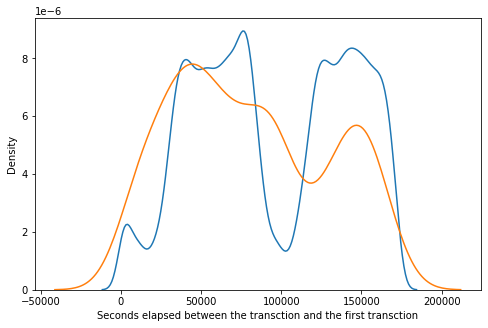

In [ ]:
#finding the effective column

# Distribution plot of time 
plt.figure(figsize=(8,5))
ax = sns.distplot(legit['Time'],label='fraudt',hist=False)
ax = sns.distplot(fraud['Time'],label='non fraud',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


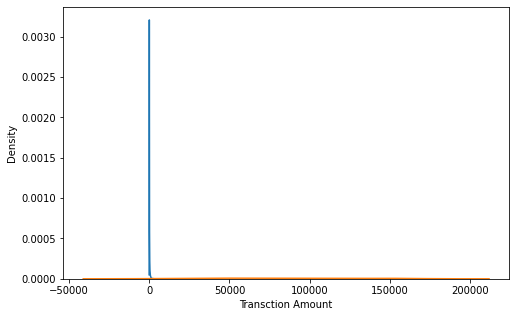

In [ ]:
# Distribution plot of Amount 
plt.figure(figsize=(8,5))
ax = sns.distplot(legit['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

In [ ]:
#Samplaing
legit_sample = legit.sample(n=492)

In [ ]:
#Concatenating two DataFrams
new_dataset = pd.concat([legit_sample, fraud], axis = 0)

In [ ]:
#Spiliting data into feature and target
X = new_dataset.drop(columns='Class', axis = 1)
Y = new_dataset['Class']

In [ ]:
#Spilting data into traing & testing data
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [ ]:
#Creating result veriable to store all the result
results = pd.DataFrame(columns=['Model Name', 'Accuracy', 'F1-score'])

In [ ]:
#Logistics Regression
logistic = LogisticRegression()

In [ ]:
logistic_model = logistic.fit(X_train, Y_test)

In [ ]:
# Prepare results function
def display_test_results(model_name, model):
    
    # Prediction on the test set
    y_test_pred = model.predict(X_test)
    
    # Confusion matrix
    print("------------------ Confusion Matrix --------------------")
    c_matrix = metrics.confusion_matrix(Y_test, y_test_pred)
    print(c_matrix)
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
    cm_display.plot(cmap=plt.cm.Blues)
    plt.show()

    # classification_report
    print("------------------ classification_report --------------------")
    print(classification_report(Y_test, y_test_pred))

   # Accuracy
    print("Accuracy:-",metrics.accuracy_score(Y_test, y_test_pred))

  # add all metrics score in final result store
    results.loc[len(results)] = [model_name, metrics.accuracy_score(Y_test, y_test_pred), f1_score(Y_test, y_test_pred)]

    return None

------------------ Confusion Matrix --------------------
[[98  1]
 [12 86]]


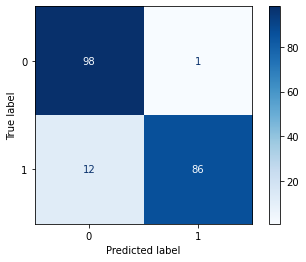

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        99
           1       0.99      0.88      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

Accuracy:- 0.934010152284264


In [ ]:
#Prediction results for Logistics Regression
display_test_results("Logistic Regression", logistic_model)

In [ ]:
#KNeighborsClassifier
knc = KNeighborsClassifier()

In [ ]:
knc_model = knc.fit(X_train,Y_train)

------------------ Confusion Matrix --------------------
[[66 33]
 [36 62]]


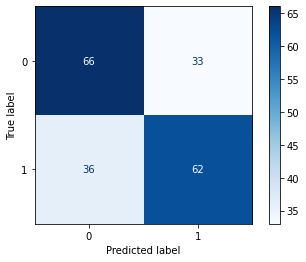

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       0.65      0.67      0.66        99
           1       0.65      0.63      0.64        98

    accuracy                           0.65       197
   macro avg       0.65      0.65      0.65       197
weighted avg       0.65      0.65      0.65       197

Accuracy:- 0.649746192893401


In [ ]:
#Prediction results for KNN
display_test_results("KNeighborsClassifier", knc_model)

------------------ Confusion Matrix --------------------
[[97  2]
 [12 86]]


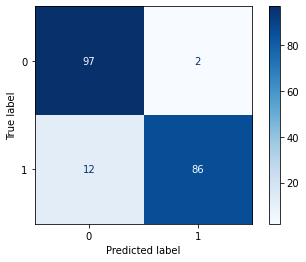

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.98      0.88      0.92        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

Accuracy:- 0.9289340101522843


In [ ]:
#Random_forest
rf = RandomForestClassifier()
rf_model = rf.fit(X_train,Y_train)
#Prediction results for RF
display_test_results("RandomForestClassifier", rf_model)

------------------ Confusion Matrix --------------------
[[91  8]
 [14 84]]


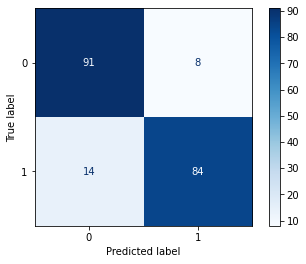

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        99
           1       0.91      0.86      0.88        98

    accuracy                           0.89       197
   macro avg       0.89      0.89      0.89       197
weighted avg       0.89      0.89      0.89       197

Accuracy:- 0.8883248730964467


In [ ]:
#DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train,Y_train)
#Prediction results for DT
display_test_results("DecisionTreeClassifier",)

------------------ Confusion Matrix --------------------
[[44 55]
 [46 52]]


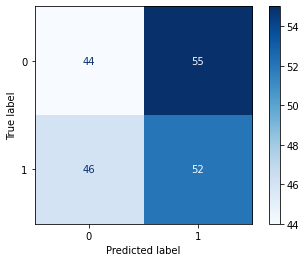

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       0.49      0.44      0.47        99
           1       0.49      0.53      0.51        98

    accuracy                           0.49       197
   macro avg       0.49      0.49      0.49       197
weighted avg       0.49      0.49      0.49       197

Accuracy:- 0.4873096446700508


In [ ]:
#SVC
svc = SVC()
svc_model = svc.fit(X_train,Y_train)
#Prediction results for SVC
display_test_results("SVC", svc_model)

In [ ]:
#summary 
results.sort_values(by="Accuracy", ascending=False)

,Model Name,Accuracy,F1-score
0,Logistic Regression,0.934010,0.929730
2,RandomForestClassifier,0.928934,0.924731
3,DecisionTreeClassifier,0.888325,0.884211
1,KNeighborsClassifier,0.649746,0.642487
4,SVC,0.487310,0.507317
